In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(uri)

In [0]:
dados_notas["nota_media"] = (dados_notas["ciencias_naturais"] + dados_notas["ciencias_humanas"] + dados_notas["linguagem_codigo"] + dados_notas["matematica"] + dados_notas["redacao"])/5

In [7]:
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao,nota_media
0,0.00,0.00,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00,680.00,654.80
2,409.20,531.70,389.00,438.10,600.00,473.60
3,452.30,505.50,448.50,544.90,400.00,470.24
4,0.00,0.00,0.00,0.00,0.00,0.00


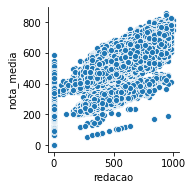

In [0]:
#Relação entre a nota da redação e a nota média geral.
sns.pairplot(data=dados_notas, x_vars="redacao", y_vars="nota_media")

# **DESAFIO 1 :**

Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [0]:
#As pessoas que não tiveram presença possuem nota como NaN, assim apenas preencho NaN com 0.
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas]
dados_notas.columns = ["ciencias_naturais","ciencias_humanas", "linguagem_codigo", "matematica", "redacao" ]
dados_notas = dados_notas.fillna(0)

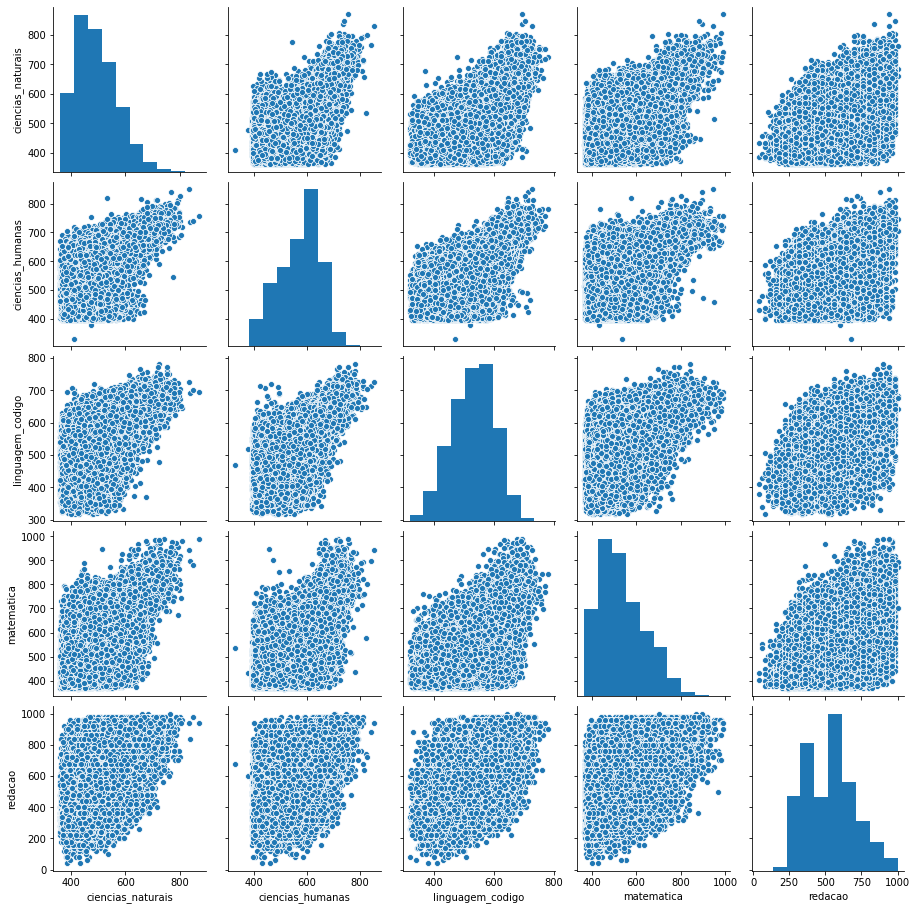

In [0]:
sns.pairplot(data=dados_notas.query("ciencias_naturais > 0	& ciencias_humanas > 0 & linguagem_codigo > 0 &	matematica > 0 &	redacao > 0"))

# **DESAFIO 2 :**

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [0]:
corr = dados_notas.corr()

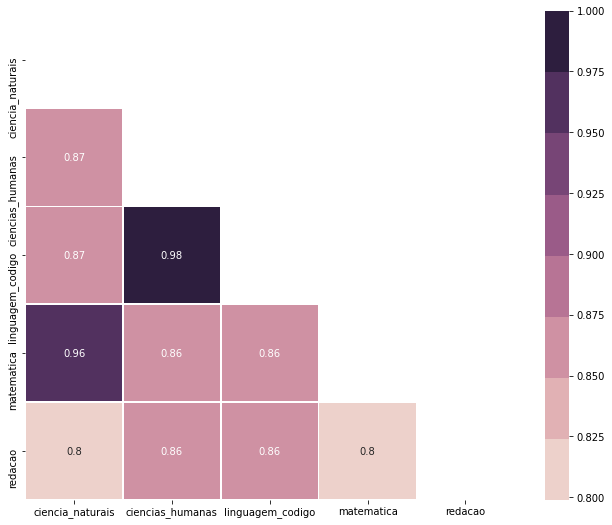

In [0]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,9))
sns.heatmap(corr, annot=True, square=True, linewidths=0.5, cmap=sns.cubehelix_palette(8), mask=mask)

# **DESAFIO 3 :**

Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas.

Foram excluídos linhas que apresentavam "NaN" nas colunas de RESPOSTAS, para a realização da análise de número de acertos.

In [0]:
#Escolho as colunas necessárias e retiro NaN
respostas = dados[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN',
 'TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT', 'NU_NOTA_REDACAO']].dropna()

#Separo as "strings" de respostas e gabaritos em listas(arrays) para cada matéria
resp_cn = respostas["TX_RESPOSTAS_CN"].values
gab_cn = respostas["TX_GABARITO_CN"].values

resp_ch = respostas["TX_RESPOSTAS_CH"].values
gab_ch = respostas["TX_GABARITO_CH"].values

resp_lc = respostas["TX_RESPOSTAS_LC"].values
gab_lc = respostas["TX_GABARITO_LC"].values

resp_mt = respostas["TX_RESPOSTAS_MT"].values
gab_mt = respostas["TX_GABARITO_MT"].values

In [0]:
#Função que recebe 2 arrays, e compara as strings que estão dentro de cada array.
#Por exemplo, comparo o item 1 da lista de respostas, com o item 1 da lista de gabarito.
#O count serve para que sempre que for encontrado uma igualdade entre resposta e gabarito, seja atribuido +1, formando assim a quantidade de acertos.
#Pega-se o count e coloca dentro de uma lista
#A função retorna essa lista com os valores de acertos.
def acertos(arrayR, arrayG):
  quant_acertos = []
  for c in range(len(arrayR)):
    count = 0
    for i in range(45):
      if (arrayR[c][i] == arrayG[c][i]):
        count += 1
    quant_acertos.append(count)   
  return quant_acertos   

In [0]:
respostas['acertos_cn'] = acertos(resp_cn, gab_cn)
respostas['acertos_ch'] = acertos(resp_ch, gab_ch)
respostas['acertos_lc'] = acertos(resp_lc, gab_lc)
respostas['acertos_mt'] = acertos(resp_mt, gab_mt)

In [0]:
redacao_e_acertos = respostas[["NU_NOTA_REDACAO",	"acertos_cn",	"acertos_ch",	"acertos_lc",	"acertos_mt"]]

In [0]:
redacao_e_acertos.head()

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
1,680.00,11,27,30,22
2,600.00,8,9,8,6
3,400.00,7,10,10,10
6,560.00,11,9,14,8
8,660.00,8,12,15,13


In [0]:
redacao_e_acertos.corr()

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
NU_NOTA_REDACAO,1.00,0.48,0.54,0.56,0.44
acertos_cn,0.48,1.00,0.62,0.56,0.57
acertos_ch,0.54,0.62,1.00,0.73,0.57
acertos_lc,0.56,0.56,0.73,1.00,0.53
acertos_mt,0.44,0.57,0.57,0.53,1.00


In [0]:
#Apenas uma análise entre os participantes que tiraram 1000 na redação
red_1000 = redacao_e_acertos.query("NU_NOTA_REDACAO == 1000")
red_1000

,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
91289,"1,000.00",30,37,25,35
98019,"1,000.00",36,39,29,39
131467,"1,000.00",23,32,28,17


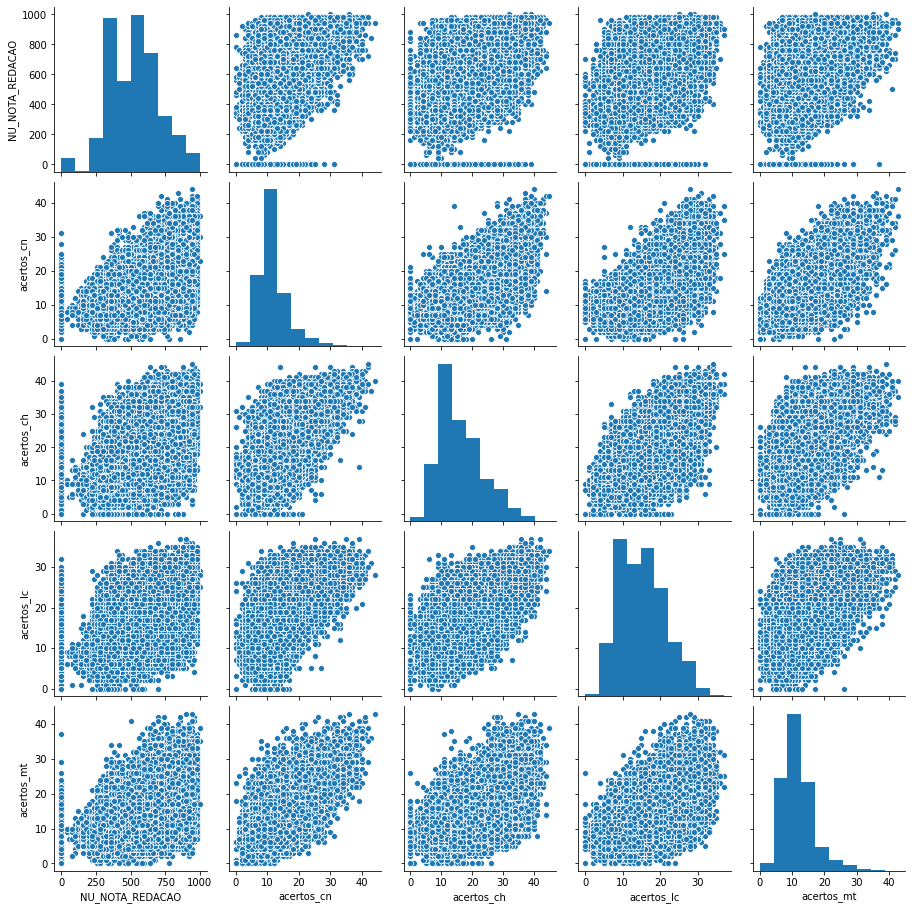

In [0]:
#Pairplot entre os numeros de acertos para cada matéria, e a redação
sns.pairplot(redacao_e_acertos)

# **DESAFIO 4 :**

Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
#Zeros retirados de forma bruta
#Desconheço outra maneira por enquanto
dados_notas_sem0 = dados_notas.query("ciencias_naturais > 0	& ciencias_humanas > 0 &	linguagem_codigo > 0 &	matematica > 0 &	redacao > 0")

In [0]:
dados_notas_sem0.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao,nota_media
1,523.10,671.30,661.60,738.00,680.00,654.80
2,409.20,531.70,389.00,438.10,600.00,473.60
3,452.30,505.50,448.50,544.90,400.00,470.24
6,428.50,505.20,521.00,436.80,560.00,490.30
8,491.80,575.70,524.40,487.60,660.00,547.90


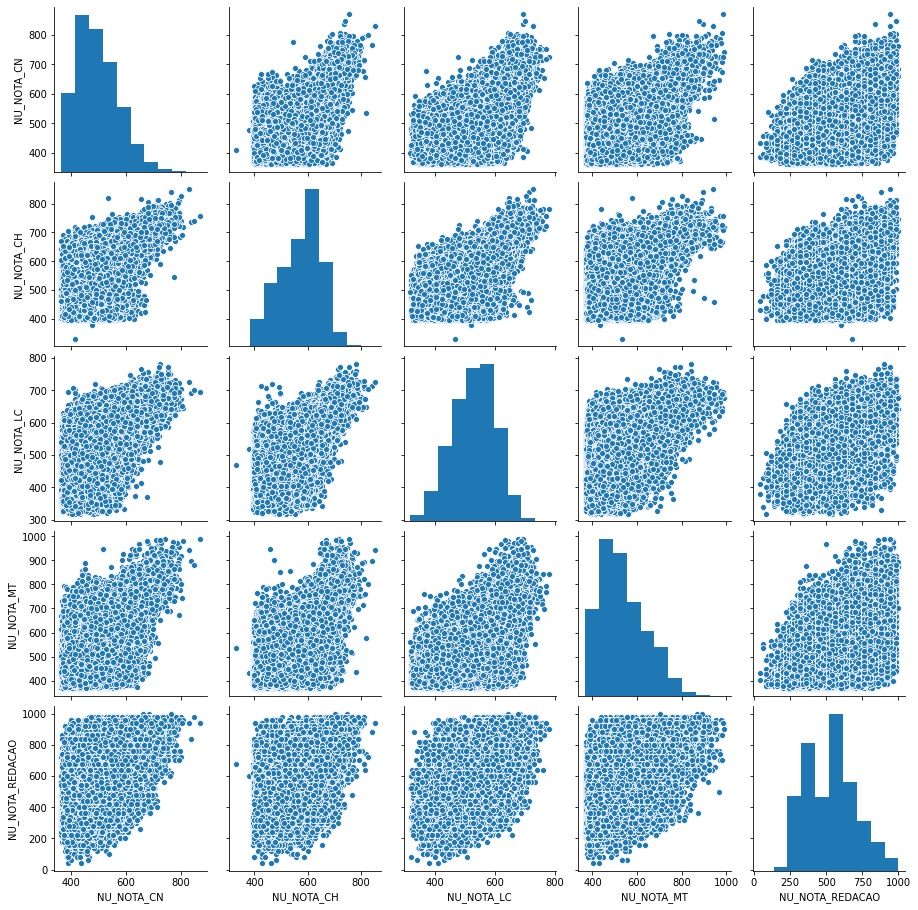

In [0]:
sns.pairplot(dados_notas_sem0)

# **DESAFIO 5 :**

Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)